Multiple Linear Regression

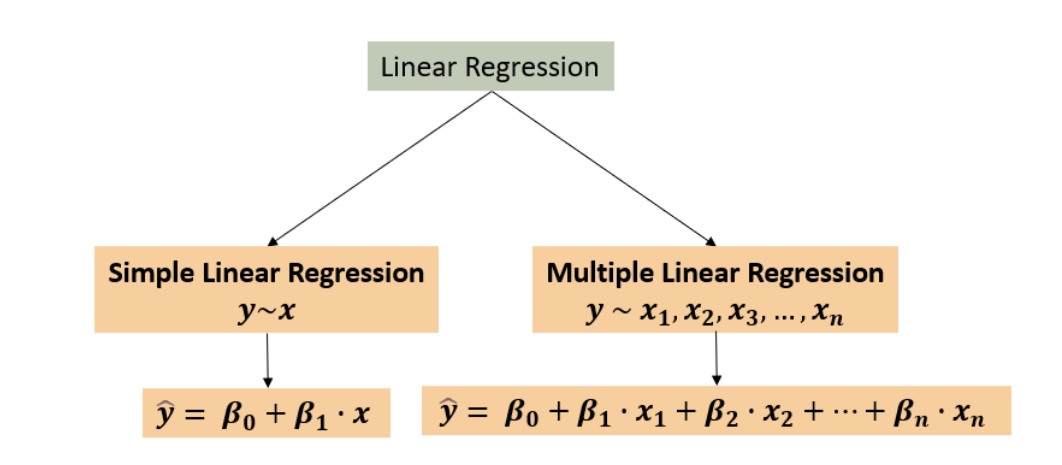

In [41]:
from warnings import filterwarnings
filterwarnings ('ignore')
    

###### PROFIT ~ RND, ADMIN, MKT
###### PROFIT = B0 + B1*RND + B2*ADMIN + B3*MKT

### Step 1 - Read the dataset

In [42]:
import pandas as pd
df= pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Step 2 - Perforom the basic data quality checks

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [44]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [45]:
df.duplicated().sum()

0

Step 3 - Separate X(RND, ADMIN, MKT) and Y(PROFIT)

In [46]:
X= df[["RND", "ADMIN", "MKT"]]
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [47]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Step 4: Build Linear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model= LinearRegression()
model.fit(X,Y)

LinearRegression()

In [50]:
model.intercept_

array([50122.19298987])

In [51]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [52]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [53]:
c= pd.Series(model.coef_.flatten(), index= X.columns)
c

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

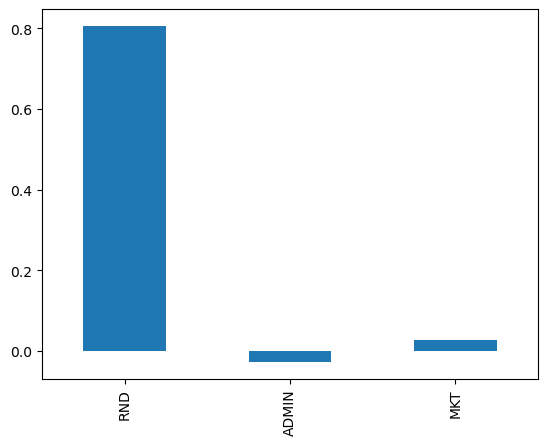

In [54]:
c.plot(kind= 'bar')

From the above bar chart we can conclude that RND is impacting Profit the most

PROFIT_Est = 50122.19 + 0.80571 X RND -0.026816 X ADMIN + 0.027228 X MKT

In [55]:
model.score(X,Y)

0.9507459940683246

Model Evaluation

  1.Mean Squared Error

  2.Root Mean Squared Error
  
  3.Mean Absolute Error
  
  4.Mean Absolute Percentage Error
  
  5.R2 Score

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score


In [72]:
def evaluate_model(model,X,Y):
    y_pred = model.predict(X)
    #Get the results
    mse= mean_squared_error(Y, y_pred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, y_pred)
    mape = mean_absolute_percentage_error(Y, y_pred)
    r2 = r2_score(Y,y_pred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE :{rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE :{mape:.2f}")
    print(f"r2_score:{r2:.4f}")

In [73]:
evaluate_model(model,X,Y)

MSE : 78417126.02
RMSE :8855.34
MAE: 6471.45
MAPE :0.11
r2_score:0.9507


##### R2 Score > 80% so this is good model.

##### Out of sample prediction

In [77]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [76]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [79]:
rnd = 50000
Admin= 50000
mkt= 50000
x_new= [[rnd,Admin,mkt]]
profit_est= model.predict(x_new)
profit_est

array([[90428.55030596]])